<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch2_Single_Multiple_Poly_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem:** We have a dataset named House, which has four columns: House ID (integer), Square Footage (integer), Number of Bedrooms (integer), and Price k$ (integer).

https://raw.githubusercontent.com/amrahmani/ML/main/house_data.csv

Using Python code, first, handle missing values by filling them with the mean, then remove outliers using Z-scores, and scale features.

Then, perform the following five tasks:

1) Predict house prices based on square footage using simple regression.

2) Predict house prices based on the number of bedrooms using simple regression.

3) Predict house prices based on square footage using polynomial regression (degree=2).

4) Predict house prices based on square footage using polynomial regression (degree=10).

5) Predict house prices based on square footage and number of bedrooms (multiple regression).

Calculate R² and Adjusted R² for each above tasks and

Finally, predict prices for new houses and evaluate prediction accuracy using MAE, MSE, and RMSE.


    House ID  Square Footage  Number of Bedrooms  Price ($)
0          1            3176                   3     451231
1          2            3076                   2     411161
2          3            1241                   3     282771
3          4            3279                   2     435325
4          5            1775                   4     380753
..       ...             ...                 ...        ...
95        96            1637                   4     348805
96        97            1640                   5     397384
97        98            2861                   2     379593
98        99            1685                   5     406031
99       100            1187                   2     206410

[100 rows x 4 columns]

Missing values:
House ID              0
Square Footage        0
Number of Bedrooms    0
Price ($)             0
dtype: int64
Simple Linear Regression - Square Footage:
R²: 0.47
Adjusted R²: 0.44
MAE: 50007.96
MSE: 3423294225.07
RMSE: 58508.92

Simple Line

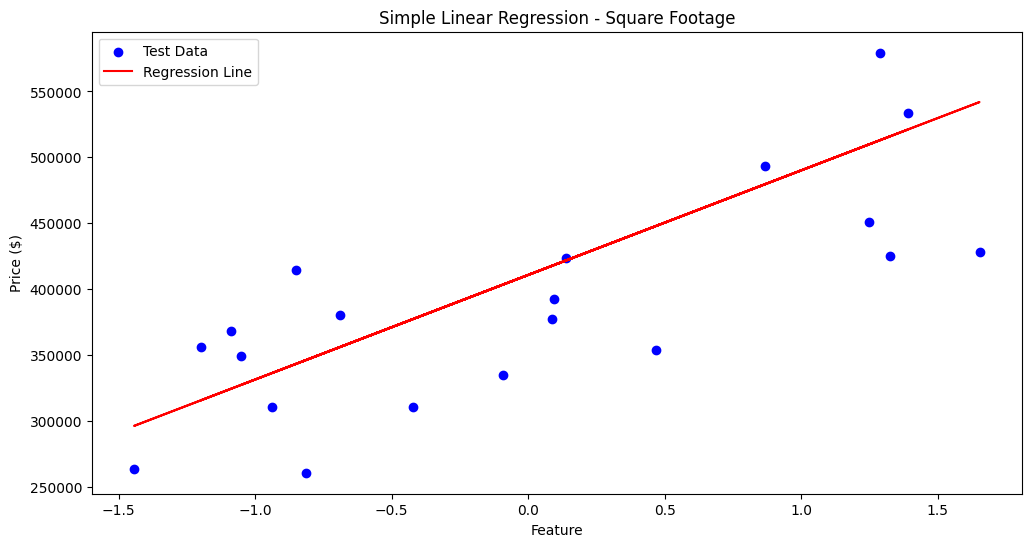

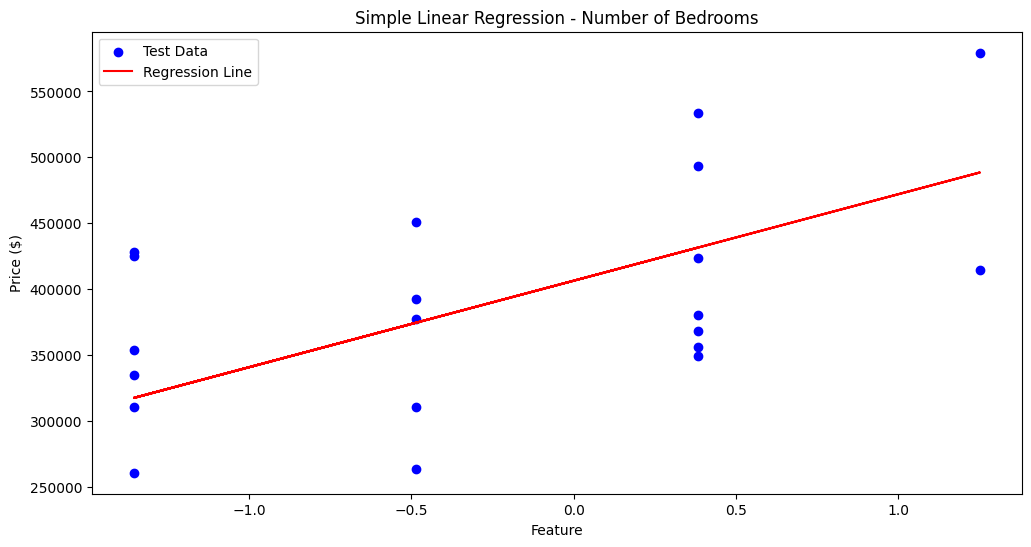

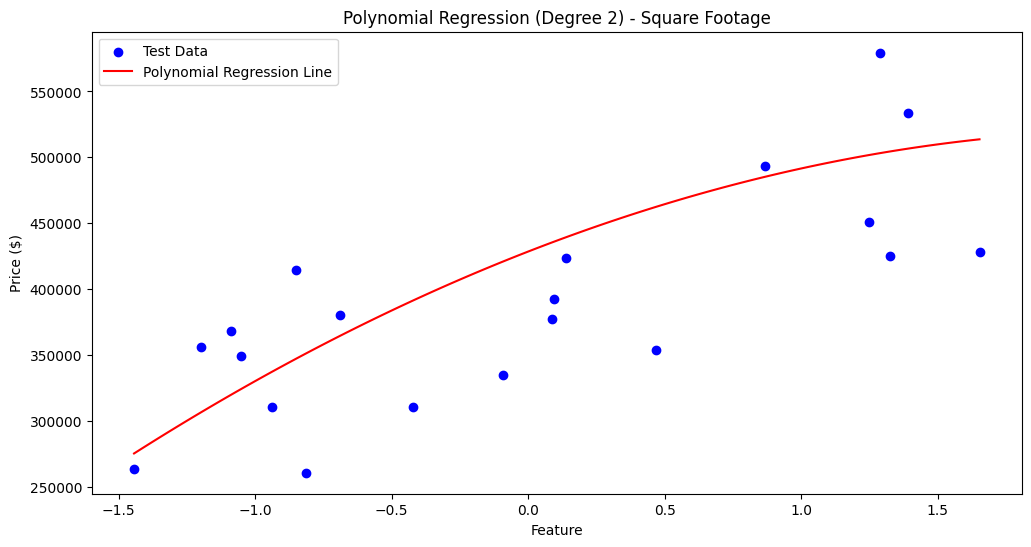

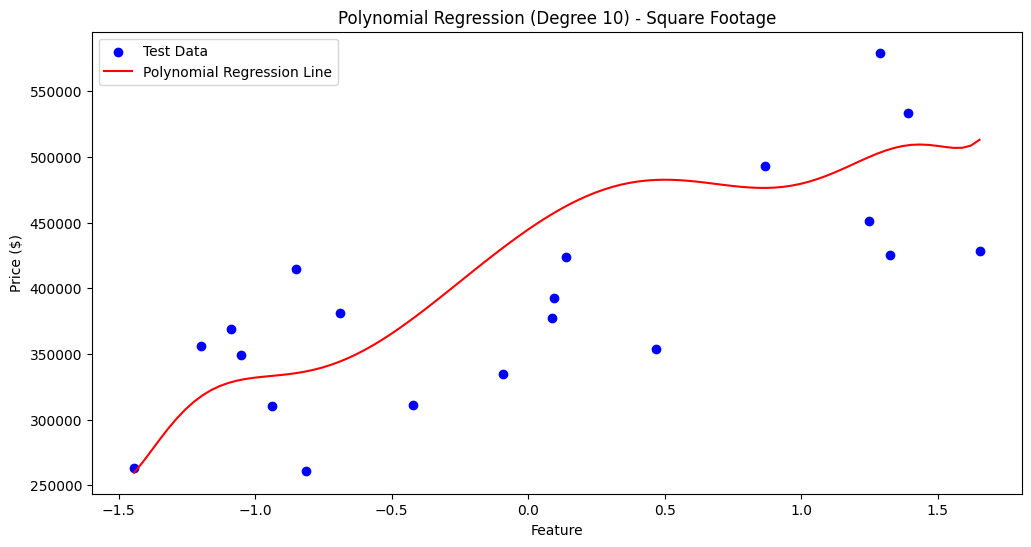

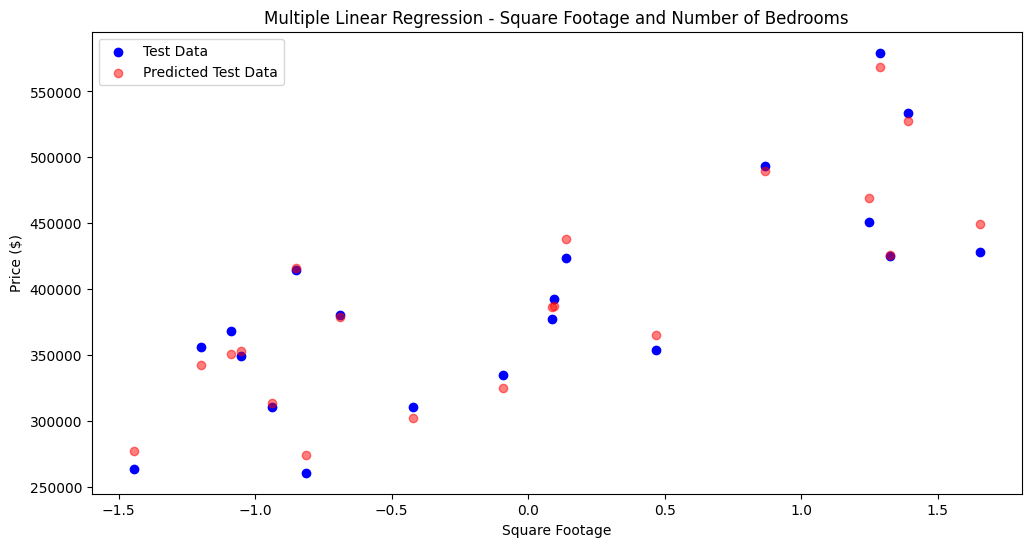

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

url = 'https://raw.githubusercontent.com/amrahmani/ML/main/house_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
house = pd.read_csv(url)
print(house)
# Data Preparation
# Check for missing values
print("\nMissing values:")
print(house.isnull().sum())  # Check for missing values

# Handle missing values by filling them with the mean of the column
house.fillna(house.mean(), inplace=True)

# Remove outliers using Z-score
z_scores = np.abs((house - house.mean()) / house.std())
house = house[(z_scores < 3).all(axis=1)]

# Scale features
# StandardScaler() scales the numerical features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
house[['Square Footage', 'Number of Bedrooms']] = scaler.fit_transform(house[['Square Footage', 'Number of Bedrooms']])

# Split data into training and testing sets
X_sqft = house[['Square Footage']]
X_bedrooms = house[['Number of Bedrooms']]
X_combined = house[['Square Footage', 'Number of Bedrooms']]
y = house['Price ($)']

# Split the dataset into training and testing sets
# test_size=0.2 specifies 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_sqft_train, X_sqft_test, y_train, y_test = train_test_split(X_sqft, y, test_size=0.2, random_state=42)
X_bedrooms_train, X_bedrooms_test, _, _ = train_test_split(X_bedrooms, y, test_size=0.2, random_state=42)
X_combined_train, X_combined_test, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
# very important: model.fit is used to train a machine learning model
    model.fit(X_train, y_train)
# After training the model, model.predict is used to make predictions on a new dataset
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)
# adjusted_r2 = 1 -((1 - r2)*(n - 1))/(n-p-1), where n is the number of samples, p is the number of independent variables
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)

    print(f"R²: {r2:.2f}")
    print(f"Adjusted R²: {adj_r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return y_pred_test

# 1. Predict house prices based on square footage using simple regression
print("Simple Linear Regression - Square Footage:")
model_sqft = LinearRegression()
y_pred_test_sqft = evaluate_model(model_sqft, X_sqft_train, X_sqft_test, y_train, y_test)

# 2. Predict house prices based on number of bedrooms using simple regression
print("\nSimple Linear Regression - Number of Bedrooms:")
model_bedrooms = LinearRegression()
y_pred_test_bedrooms = evaluate_model(model_bedrooms, X_bedrooms_train, X_bedrooms_test, y_train, y_test)

# 3. Predict house prices based on square footage using polynomial regression (degree=2)
print("\nPolynomial Regression (Degree 2) - Square Footage:")
# generate polynomial features from the original data, degree = 2, X+X^2
poly_2 = PolynomialFeatures(degree=2)
# fit_transform: fit=Learns the parameters from the data and tansform=applies the transformation.
X_sqft_poly_2_train = poly_2.fit_transform(X_sqft_train)
# For 'test data', only the transform method is applied, not fit_transform: fit=Learns the parameters from the data and tansform=applies the transformation.
X_sqft_poly_2_test = poly_2.transform(X_sqft_test)
model_poly_2 = LinearRegression()
y_pred_test_poly_2 = evaluate_model(model_poly_2, X_sqft_poly_2_train, X_sqft_poly_2_test, y_train, y_test)

# 4. Predict house prices based on square footage using polynomial regression (degree=10)
print("\nPolynomial Regression (Degree 10) - Square Footage:")
poly_10 = PolynomialFeatures(degree=10)
X_sqft_poly_10_train = poly_10.fit_transform(X_sqft_train)
X_sqft_poly_10_test = poly_10.transform(X_sqft_test)
model_poly_10 = LinearRegression()
y_pred_test_poly_10 = evaluate_model(model_poly_10, X_sqft_poly_10_train, X_sqft_poly_10_test, y_train, y_test)

# 5. Predict house prices based on square footage and number of bedrooms (multiple regression)
print("\nMultiple Linear Regression - Square Footage and Number of Bedrooms:")
model_combined = LinearRegression()
y_pred_test_combined = evaluate_model(model_combined, X_combined_train, X_combined_test, y_train, y_test)

# Visualize all cases
def plot_regression_results(X, y_test, y_pred_test, model, title, poly=False, degree=None):
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y_test, color='blue', label='Test Data')
    if poly:
        X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        poly_features = PolynomialFeatures(degree=degree)
        X_line_poly = poly_features.fit_transform(X_line)
        y_line = model.predict(X_line_poly)
        plt.plot(X_line, y_line, color='red', label='Polynomial Regression Line')
    else:
        plt.plot(X, y_pred_test, color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

# Plotting results
plot_regression_results(X_sqft_test, y_test, y_pred_test_sqft, model_sqft, 'Simple Linear Regression - Square Footage')
plot_regression_results(X_bedrooms_test, y_test, y_pred_test_bedrooms, model_bedrooms, 'Simple Linear Regression - Number of Bedrooms')
plot_regression_results(X_sqft_test, y_test, y_pred_test_poly_2, model_poly_2, 'Polynomial Regression (Degree 2) - Square Footage', poly=True, degree=2)
plot_regression_results(X_sqft_test, y_test, y_pred_test_poly_10, model_poly_10, 'Polynomial Regression (Degree 10) - Square Footage', poly=True, degree=10)

# For multiple regression, we need to adjust the plotting function
def plot_multiple_regression_results(X_test, y_test, y_pred_test, title):
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test['Square Footage'], y_test, color='blue', label='Test Data')
    plt.scatter(X_test['Square Footage'], y_pred_test, color='red', label='Predicted Test Data', alpha=0.5)
    plt.title(title)
    plt.xlabel('Square Footage')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

plot_multiple_regression_results(X_combined_test, y_test, y_pred_test_combined, 'Multiple Linear Regression - Square Footage and Number of Bedrooms')


**Predict prices for new houses**


In [2]:
# Predict prices for new houses
new_houses = pd.DataFrame({
    'Square Footage': [1500, 2500, 4000],
    'Number of Bedrooms': [2, 5, 10]
})
new_houses_scaled = scaler.transform(new_houses)
new_prices_sqft = model_sqft.predict(new_houses_scaled[:, 0].reshape(-1, 1))
new_prices_bedrooms = model_bedrooms.predict(new_houses_scaled[:, 1].reshape(-1, 1))
new_prices_poly_2 = model_poly_2.predict(poly_2.transform(new_houses_scaled[:, 0].reshape(-1, 1)))
new_prices_poly_10 = model_poly_10.predict(poly_10.transform(new_houses_scaled[:, 0].reshape(-1, 1)))
new_prices_combined = model_combined.predict(new_houses_scaled)

print("\nPredicted prices for new houses:")
print("Based on Square Footage (Simple Regression):", new_prices_sqft.astype(int))
print("Based on Number of Bedrooms (Simple Regression):", new_prices_bedrooms.astype(int))
print("Based on Square Footage (Polynomial Regression Degree 2):", new_prices_poly_2.astype(int))
print("Based on Square Footage (Polynomial Regression Degree 10):", new_prices_poly_10.astype(int))
print("Based on Square Footage and Number of Bedrooms (Multiple Regression):", new_prices_combined.astype(int))


Predicted prices for new houses:
Based on Square Footage (Simple Regression): [325801 435609 600320]
Based on Number of Bedrooms (Simple Regression): [317543 488429 773240]
Based on Square Footage (Polynomial Regression Degree 2): [321906 452048 520542]
Based on Square Footage (Polynomial Regression Degree 10): [  329405   477417 17828076]
Based on Square Footage and Number of Bedrooms (Multiple Regression): [255593 498740 887560]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(X_sqft_train)
print(X_sqft_poly_2_train.shape)
print(X_sqft_poly_2_train[:5])

print(X_sqft_poly_2_test.shape)
print(X_sqft_poly_2_test[:5])

print(X_sqft_poly_10_train.shape)
print(X_sqft_poly_10_train[:5])

print(X_combined_train.shape)
print(X_combined_train[:5])


    Square Footage
55        1.394459
88        0.846124
26       -0.699182
42        0.293636
69       -1.541069
..             ...
60        0.180092
71        0.868279
14       -1.161666
92       -0.960887
51        0.321330

[80 rows x 1 columns]
(80, 3)
[[ 1.          1.3944587   1.94451508]
 [ 1.          0.8461243   0.71592633]
 [ 1.         -0.69918176  0.48885513]
 [ 1.          0.29363584  0.08622201]
 [ 1.         -1.54106892  2.37489343]]
(20, 3)
[[ 1.         -0.85149687  0.72504692]
 [ 1.          1.39030466  1.93294704]
 [ 1.          1.29060749  1.6656677 ]
 [ 1.         -1.05227588  1.10728453]
 [ 1.          1.6533944   2.73371303]]
(80, 11)
[[ 1.00000000e+00  1.39445870e+00  1.94451508e+00  2.71154598e+00
   3.78113889e+00  5.27264204e+00  7.35248159e+00  1.02527319e+01
   1.42970113e+01  1.99365919e+01  2.78007541e+01]
 [ 1.00000000e+00  8.46124298e-01  7.15926328e-01  6.05762662e-01
   5.12550508e-01  4.33681439e-01  3.66948403e-01  3.10483960e-01
   2.62708023e-01

**Practice:**

Use the following dataset containing information about customers (e.g., Customer ID, Gender, Age, Annual Income (k$), Score (1-100)).

https://github.com/amrahmani/ML/blob/main/customers.csv

First, analyze the relationships between Annual Income (k$) and other variables. Then, predict Annual Income using simple regression, polynomial regression (degree 3), and multiple regression models.